In [1]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기

#필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 🗂️ Step 2: 데이터 불러오기

#CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [3]:
# 여기에서 확인해 보세요.

In [4]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요.
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [16]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(128))  # TODO: 은닉층 유닛 수 설정
model.add(layers.Dense(10))  # 출력층: CIFAR-10은 클래스가 10개

## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요.
(padding은 디폴트로 없습니다.)

Answer:

In [17]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2972 - loss: 4.0032 - val_accuracy: 0.4784 - val_loss: 1.4351
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5083 - loss: 1.3811 - val_accuracy: 0.5306 - val_loss: 1.3044
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5652 - loss: 1.2351 - val_accuracy: 0.5831 - val_loss: 1.1939
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6110 - loss: 1.1220 - val_accuracy: 0.6114 - val_loss: 1.1356
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6479 - loss: 1.0193 - val_accuracy: 0.6309 - val_loss: 1.0771
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6761 - loss: 0.9380 - val_accuracy: 0.6561 - val_loss: 1.0200
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7001 - loss: 0.8641 - val_accuracy: 0.6571 - val_loss: 1.0389
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7257 - loss: 0.80

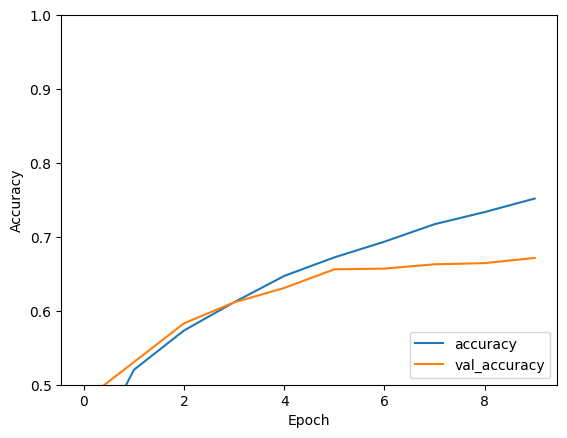

In [18]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [19]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.671500027179718


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


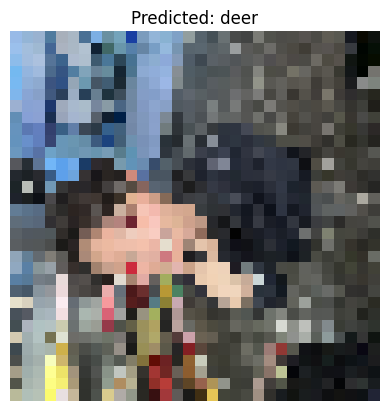

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path = "me.jpeg"
predict_new_image(image_path, model, class_names)


## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

Answer: 이미지에서는 RGB 채널을 기준으로 각 픽셀당 0\~255 범위의 값을 가진다.
이를 255.0 으로 나누면 0\~1사이의 값으로 정규화된다.

만약 값이 너무 크면 가중치의 gradient가 함께 커져 너무 빨리 이동하거나, 발산할 위험이 있다.
값을 0~1로 범위를 작게 하여 더욱 안정적으로 gradient가 수렴할 수 있게 해준다.

## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer:

1. 국소성(Locality)

이미지는 공간 구조가 있는 데이터이다. 즉, 인접한 픽셀끼리는 관련이 깊고, 멀리 떨어진 픽셀 끼리는 덜 관련이 있다.

예를 들어 고양이의 사진이 있다면 귀와 얼굴의 픽셀들은 밀접한 관계가 있지만, 그에 비해 귀와 꼬리는 관계가 거의 없다.

inductive bias는 이러한 국소성을 가정하고 학습이 진행될 수 있도록 하며, 커널을 이용해 모서리, 선 등의 작은 영역의 국소적인 특징을 추출할 수 있다.

2. 가중치 공유(위치 불변성)

이미지 내에서의 패턴은 위치에 관계없이 존재할 수 있다.
예를 들어 고양이의 위치는 이미지의 왼쪽 아래, 오른쪽 위 그 어떤 곳에 있어도 상관없다.

CNN은 학습한 커널의 가중치를 전체 이미지에 대해서 공유한다. 그 커널이 가지는 가중치는 특정한 특징을 탐지할 수 있는데, 이미지의 어느 특정 위치만 확인하는 것이 아닌 이미지 전체를 돌아보며 확인하므로 어떠한 특징이 어디에 있더라고 같은 커널로 잡아낼 수 있다.

즉 위치에 관계없이 같은 패턴은 하나의 커널을 이용해 잡아낼 수 있다는 inductive bias를 가지게 된다.


이러한 CNN의 inductive bias의 특징은 시계열 분석에서도 이용될 수 있다.
특히 심전도 데이터 분석에서 inductive bias의 특징은 효과적으로 작용한다.

심전도 데이터에서는 P파, QRS파, T파 등 특정한 파형들이 국소 구간에서 반복적으로 나타나는 양상을 볼 수 있다.
특정한 파형과 그러한 파형이 시간적으로 어디에든 위치할 수 있다는 유동성은 위에서 설명했던 inductive bias의 국소성과 위치 불변성을 잘 활용할 수 있는 이유이기도 하다

